__Objectives__

- What is polynomial regression? Why do we need them?

- Use sklearn to generate polynomial features.

- What is training error and test error?

- What is Bias and Variance in ML? 

- What is underfitting and overfitting?

<br>

- Bias/Variance trade off and underfitting/overfitting are "siblings"

# Polynomial Regression

Recall that before we discussed the linear models. Today we will see that the linearity assumption is very insufficient to explain complex relations. In order to be able to address this problem we will see how to add higher orders of a variable to detect non-linear relations between X and y. 

- In polynomial regression our model will look like:

$$\hat y_i = \hat\beta_0+\hat\beta_1x_i +\hat\beta_2 x^2_i+\hat\beta_3 x^3_i+...+\hat\beta_d x^d_i+\epsilon_i$$ 

- For the loss function we will be still using RSS.

In [9]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

import pickle

In [4]:
## Uniformly sample from -2pi and 2pi. We will be working with 150 observations.

x = np.random.uniform(-2*pi, 2*pi, 150)
# Draw 150 random points from -2pi to 2pi

## We created the target variables y: So we know the true relation between x and y 
## Note also that we added some noise to the y variable.

y = np.sin(x) + np.random.normal(loc = 0, scale = 0.4, size = len(x))

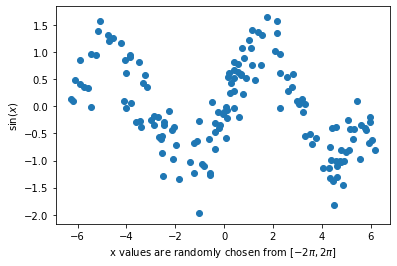

In [5]:
## Let's plot the data
plt.scatter(x,y)

plt.ylabel('$\sin(x)$')

plt.xlabel('x values are randomly chosen from $[-2\pi, 2\pi]$')

plt.show()

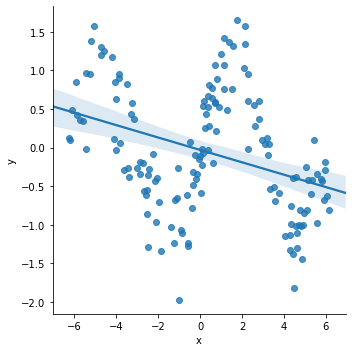

In [8]:
# use seaborn lmplot to visualize regression line 
import pandas as pd

data = pd.DataFrame(data = {'x': x, 'y':y})

import seaborn as sns

sns.lmplot(x = 'x', y= 'y', data = data)

plt.show()

As it is clear from the plot the linear model is insufficient to capture the pattern in the data. This is called __underfitting__. One solution to this problem is to increase the number of variables by adding higher orders of the already existing variables. 

__Your Turn__

- We will use PolynomialFeature class to be able to create new features.

- Create a new dataset with all the powers of x up to 7 degree.

In [10]:
## Now let's use PolynomialFeature to create higher order features
from sklearn.preprocessing import PolynomialFeatures

In [43]:
# %load -r 1-5 supplement.py
## Instantiate the PolynomialFeatures object with degree=7 b/c PolynomialFeatures is a CLASS
poly = PolynomialFeatures(degree =7)

## Now transform data to create higher order features
X7 = poly.fit_transform(x.reshape(-1,1))

print(X7.shape) # 8 columns b/c includes intercept and X, X^2, X^3, X^4...etc
X7

(150, 8)


array([[ 1.00000000e+00, -3.24502147e+00,  1.05301643e+01, ...,
        -3.59822130e+02,  1.16763053e+03, -3.78898615e+03],
       [ 1.00000000e+00, -2.13585450e+00,  4.56187443e+00, ...,
        -4.44486236e+01,  9.49357925e+01, -2.02769039e+02],
       [ 1.00000000e+00, -3.46256573e+00,  1.19893614e+01, ...,
        -4.97725775e+02,  1.72340821e+03, -5.96741420e+03],
       ...,
       [ 1.00000000e+00, -4.21601263e+00,  1.77747625e+01, ...,
        -1.33201622e+03,  5.61579721e+03, -2.36762719e+04],
       [ 1.00000000e+00,  1.40556508e+00,  1.97561320e+00, ...,
         5.48598729e+00,  7.71091217e+00,  1.08381889e+01],
       [ 1.00000000e+00,  2.30038229e+00,  5.29175868e+00, ...,
         6.44169380e+01,  1.48183583e+02,  3.40878891e+02]])

In [39]:
## Fit a linear model by either using sklearn.linearmodel or statsmodel.api 

from sklearn.linear_model import LinearRegression

__Your Turn__

- Use the dataset you created above and fit a linear model to this dataset.

- Make predictions using this data and model.

In [44]:
# %load -r 8-14 supplement.py
## fitting a linear model
lr = LinearRegression(fit_intercept= False)

x = x.reshape(-1,1)
lr.fit(X7,y)

y_pred = lr.predict(X7)

__Your Turn__

- Now plot both predictions and true values and analyze the results.

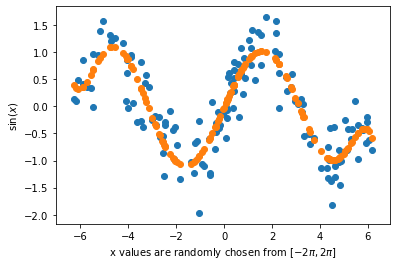

In [45]:
# %load -r 40-46 supplement.py
plt.scatter(x,y)
plt.scatter(x, y_pred)
plt.ylabel('$\sin(x)$')

plt.xlabel('x values are randomly chosen from $[-2\pi, 2\pi]$')

plt.show()

In [47]:
# return coefficients of regression model
lr.coef_

array([-1.17025127e-02,  1.02801208e+00, -1.17475299e-02, -1.58495542e-01,
        1.29675363e-03,  6.29569196e-03, -2.79486639e-05, -7.59596458e-05])

__Q:__ It looks like polynomial variables works very well, then why don't we add polynomial features all the time?

# Bias - Variance

In statistical learning and machine learning we start with a model:

$$ Y = f(X) + \epsilon$$

Here $f$ is the function that gives the 'true' relationship between $X$ values and $Y$ values.

- In many situation, from a given a train set $X, y$ we would like to find an estimate $\hat{f}$ of $f$. 

- Notice that the actual $f$ might be very complicated and $\hat{f}$ will be a simplified estimator of $f$ in general.

- We can evaluate the models performance with a metric. In regression setting it is mostly given as MSE:


$$ MSE = \frac{1}{n}\sum\limits_{i=1}^{n}(y_{i} - \hat{f}(x_{i}))^{2}$$

- However, we are really not interested in whether $\hat{f}(x_i) \sim y_i$; instead, we want to know whether $\hat{f}(x_0)$ is approximately equal to $y_{0}$, where $(x_0, y_0)$ is a previously unseen test observation not used to train the statistical learning method.

<img src="img/test_train.png" cap="Transformed dataset"  width='600'/>

- This U-shape we observe on the right between test error and training error is a very common and result of two competing notion: 'Bias' and 'Variance' of the model. More excplicitly we say that the 'average' test error can be decompose into three pieces.

<img src="img/bias_variance.png" cap="Transformed dataset"  width='400'/>

__A good model__

- Low error --> Low variance + low bias


__Variance__

- Refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set.
- How generalizable your model is with new samples. How similar the model output is with new data. High variance usually a result of overfitting. 

__Bias__

- Refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model.
- How accurate your model is with new samples. High bias is usually a result of underfitting.


__Q:__ Find a model with a very high bias and very low variance.

__Q:__ Find a model with a very high variance and very low bias.


__Your Turn__

I created a data set and stored this as a pickle. When you load the pickle we will have a list of the form [x,y]. We know that there is a polynomial relationship between x and y. Now the question is to find this relation.


In [48]:
import pickle

with open(r"data_list_xy.pickle", "rb") as input_file:
        data = pickle.load(input_file)

In [49]:
x = data[0]

y = data[1]

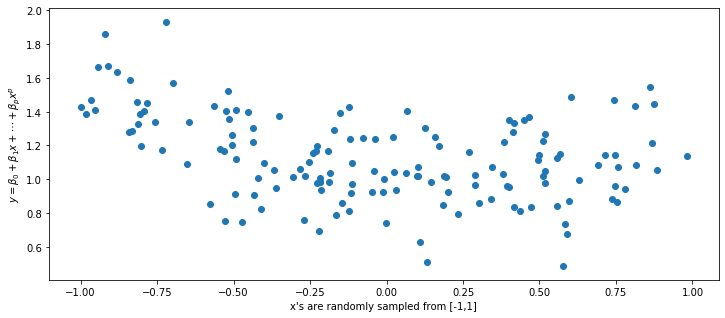

In [50]:
plt.figure(figsize = (12, 5))

plt.scatter(x,y)

plt.xlabel("x's are randomly sampled from [-1,1]" )

plt.ylabel("$y = \\beta_{0} + \\beta_{1}x + \\cdots + \\beta_{p}x^{p}$")

plt.show()

__Your Turn__

- We know that the true relation between x and y above is a polynomial one. 

- Try to find this relationship



In [69]:
# %load -r 25-32 supplement.py
poly = PolynomialFeatures(degree =2)

## Now transform data to create higher order features
X2 = poly.fit_transform(x.reshape(-1,1))

print(X2.shape) # 8 columns b/c includes intercept and X, X^2, X^3, X^4...etc

(150, 3)


In [70]:
lr = LinearRegression(fit_intercept= True)

x = x.reshape(-1,1)
lr.fit(X2,y)

y_pred = lr.predict(X2)

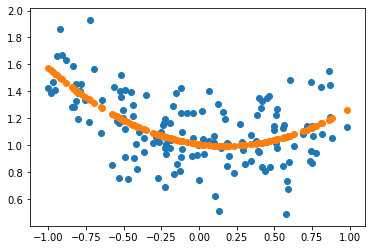

In [71]:
plt.scatter(x,y)
plt.scatter(x, y_pred)


plt.show()

In [72]:
lr.coef_

array([ 0.        , -0.14864317,  0.4183251 ])

In [74]:
# %load -r 25-32 supplement.py
## function returns the dataset of a given polynomial degree
def create_dataset(x, degree):
    ## Instantiate the PolynomialFeatures object with given 'degree'
    poly = PolynomialFeatures(degree=degree)

    ## Now transform data to create higher order features
    new_data = poly.fit_transform(x.reshape(-1, 1))
    return new_data

__Documentation__

[Sklearn-PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


__Fit a linear model__

In [75]:
def find_coefficients(data, y):
    np.set_printoptions(precision=4, suppress=True)

    lr = LinearRegression(fit_intercept=False)
    
    lr.fit(data, y)
    
    print(lr.coef_)
    
    y_pred = lr.predict(data)

    return y_pred

In [81]:
## create the dataset with given degree
new_x = create_dataset(x, degree= 2)

## fit a linear regression and print coefficients return predictions
predict = find_coefficients(new_x, y)

[ 1.0077 -0.1486  0.4183]


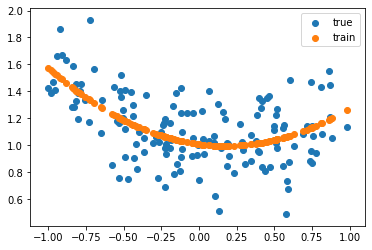

In [82]:
## plot predictions and true values
## discuss the results.
def plot_predict(x, y, y_pred):
    plt.scatter(x,y, label = 'true')
    plt.scatter(x, y_pred, label = 'train')
    plt.legend()
    plt.show()
    return
plot_predict(x,y,predict)

Method of assessment without plotting:
- 1) Split into train vs test: compare differences in Adj R^2 in train vs test
- 2) Check residual plots of each model to see if normally, randomly distributed

Run the cell below to find out the true parameters

In [36]:
# %load -r 35-37 supplement.py


The chart below is very common online so I wanted to share here. I think this gives a nice summary but please note that this is absolutely representative.

<img src="https://hsto.org/files/281/108/1e9/2811081e9eda44d08f350be5a9deb564.png" width=350, height=350>  
